### Import modules

In [1]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil

# Local imports
import analysis_functions

# Apply better style
analysis_functions.apply_heatmap_style()


### Plot tune scan

In [2]:
# Define study
STUDY_NAME = "tunescan_flathv_75_180_1500_lower_chroma_neg_oct"
COLLIDER = "base_collider"
PARQUET_PATH = f"../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0016/config_final.yaml"

# Load dataframe
df = pd.read_parquet(f"../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Keep only relevant collider
df = df.reset_index(level=1)
df = df[df["name base collider"] == COLLIDER]

df


name base collider  \
beam  i_oct_b1 i_oct_b2 dqx dqy qx     qy                          
lhcb1 -60.0    -60.0    5.0 5.0 62.305 60.309      base_collider   
                                       60.310      base_collider   
                                       60.311      base_collider   
                                       60.312      base_collider   
                                       60.313      base_collider   
...                                                          ...   
                                62.323 60.328      base_collider   
                                       60.329      base_collider   
                                62.324 60.328      base_collider   
                                       60.329      base_collider   
                                62.325 60.329      base_collider   

                                               normalized amplitude in xy-plane  \
beam  i_oct_b1 i_oct_b2 dqx dqy qx     qy                                         
lhcb1 -60.0    -60.0    5.0 5.0 62.305 60.309                             3.448   
                                       60.310                             3.241   
                                       60.311                             3.310   
                                       60.312                             3.310   
                                       60.313                             3.172   
...                                                                         ...   
                                62.323 60.328                             6.897   
                                       60.329                             5.379   
                                62.324 60.328                             6.483   
                                       60.329                             5.862   
                                62.325 60.329                             5.931   

                                                   qx      qy  dqx  dqy  \
beam  i_oct_b1 i_oct_b2 dqx dqy qx     qy                                 
lhcb1 -60.0    -60.0    5.0 5.0 62.305 60.309  62.305  60.309  5.0  5.0   
                                       60.310  62.305  60.310  5.0  5.0   
                                       60.311  62.305  60.311  5.0  5.0   
                                       60.312  62.305  60.312  5.0  5.0   
                                       60.313  62.305  60.313  5.0  5.0   
...                                               ...     ...  ...  ...   
                                62.323 60.328  62.323  60.328  5.0  5.0   
                                       60.329  62.323  60.329  5.0  5.0   
                                62.324 60.328  62.324  60.328  5.0  5.0   
                                       60.329  62.324  60.329  5.0  5.0   
                                62.325 60.329  62.325  60.329  5.0  5.0   

                                               i_bunch_b1  i_bunch_b2  \
beam  i_oct_b1 i_oct_b2 dqx dqy qx     qy                               
lhcb1 -60.0    -60.0    5.0 5.0 62.305 60.309         NaN         NaN   
                                       60.310         NaN         NaN   
                                       60.311         NaN         NaN   
                                       60.312         NaN         NaN   
                                       60.313         NaN         NaN   
...                                                   ...         ...   
                                62.323 60.328         NaN         NaN   
                                       60.329         NaN         NaN   
                                62.324 60.328         NaN         NaN   
                                       60.329         NaN         NaN   
                                62.325 60.329         NaN         NaN   

                                               i_oct_b1  i_oct_b2  \
beam  i_oct_b1 i_oct_b2 dqx dqy qx     qy                           
lhcb1 -60.0    -6

In [3]:
# Reshape for plotting
df_to_plot = df.pivot(index="qy", columns="qx", values="normalized amplitude in xy-plane")
df_to_plot

qx,62.305,62.306,62.307,62.308,62.309,62.310,62.311,62.312,62.313,62.314,...,62.316,62.317,62.318,62.319,62.320,62.321,62.322,62.323,62.324,62.325
qy,,,,,,,,,,,,,,,,,,,,,
60.309,3.448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.310,3.241,3.586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.311,3.310,3.724,3.586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.312,3.310,3.655,3.793,6.069,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.313,3.172,3.586,3.793,6.069,6.276,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.314,3.310,3.655,3.655,6.276,6.345,5.862,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.315,3.931,3.931,4.138,5.448,6.138,5.862,5.379,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.316,3.724,3.931,4.690,6.759,6.276,5.862,5.310,5.172,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.317,3.517,3.793,4.138,6.414,6.207,5.862,5.103,4.828,5.517,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Replace NaNs above the upper diagonal with 8
for qx in df_to_plot.columns:
    for qy in df_to_plot.index:
        if qy >= qx - 2 + 0.004:
            if pd.isna(df_to_plot.loc[qy, qx]):
                df_to_plot.loc[qy, qx] = 8

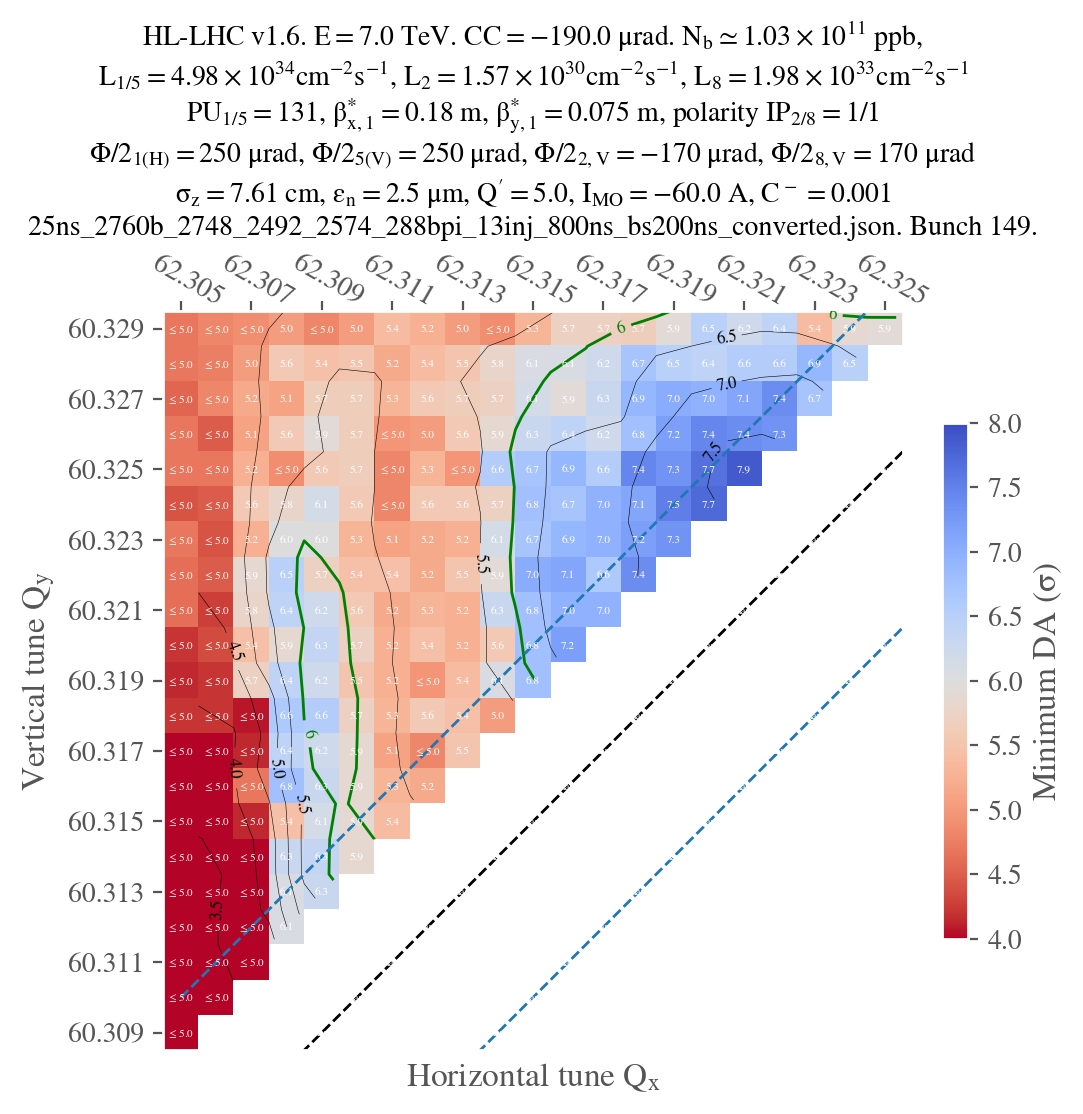

In [5]:
# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    df_to_plot,
    f'{STUDY_NAME}_{COLLIDER}',
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flathv",
    betx=0.18,
    bety=0.075,
    Nb=True,
    green_contour=6.,
    extended_diagonal=False,
    vmin=4.,
    vmax=8.0,
    CC = True,
)
# ! Verified
